## Importing Necessary Libraries and Dependencies
---- 

In [2]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

# Filter warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data
---

In [3]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path("data/housing_California.csv")
house_price_file_df = pd.read_csv(file_path)

# # Display sample data
house_price_file_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Check the DataFrame data types
house_price_file_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Data Cleaning
---

In [5]:
# Verify data missing
print(f"Total of missing values is {house_price_file_df.isnull().sum()}")

# Verify duplicate data
print(f"Total of duplicate entries is {house_price_file_df.duplicated().sum()}")

Total of missing values is longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total of duplicate entries is 0


In [6]:
# Drop data missing
house_price_df = house_price_file_df.dropna()
print(house_price_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Feature Engineering
---

In [7]:
# New Columns
house_price_df['price_per_room'] = house_price_df['median_house_value'] / house_price_df['total_rooms']
house_price_df['price_per_bedroom'] = house_price_df['median_house_value'] / house_price_df['total_bedrooms']

#Verify New Columns
print(house_price_df[['price_per_room', 'price_per_bedroom']].head())


   price_per_room  price_per_bedroom
0      514.318182        3508.527132
1       50.500070         324.141049
2      240.013633        1853.157895
3      267.896389        1452.340426
4      210.325753        1222.142857


In [8]:
# Creation of dummy variables for the ocean proximity column
ocean_proximity_dummies = pd.get_dummies(house_price_df['ocean_proximity'], drop_first=True)

# Concatenate dummy variables to the original DataFrame
house_price_df = pd.concat([house_price_df, ocean_proximity_dummies], axis=1)

# Remove the original column
house_price_df.drop('ocean_proximity', axis=1, inplace=True)

# Verify New Columns
house_price_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_per_room,price_per_bedroom,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,514.318182,3508.527132,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,50.500070,324.141049,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,240.013633,1853.157895,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,267.896389,1452.340426,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,210.325753,1222.142857,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split

X = house_price_df.drop("median_house_value", axis=1)
y = house_price_df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4756934620.249505
R-squared: 0.65214831930394


## Tree-Based Models

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")


Decision Tree MSE: 638053638.9327135
Decision Tree R-squared: 0.9533422154401314


In [12]:
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 316731875.23463035
Random Forest R-squared: 0.9768389259206169


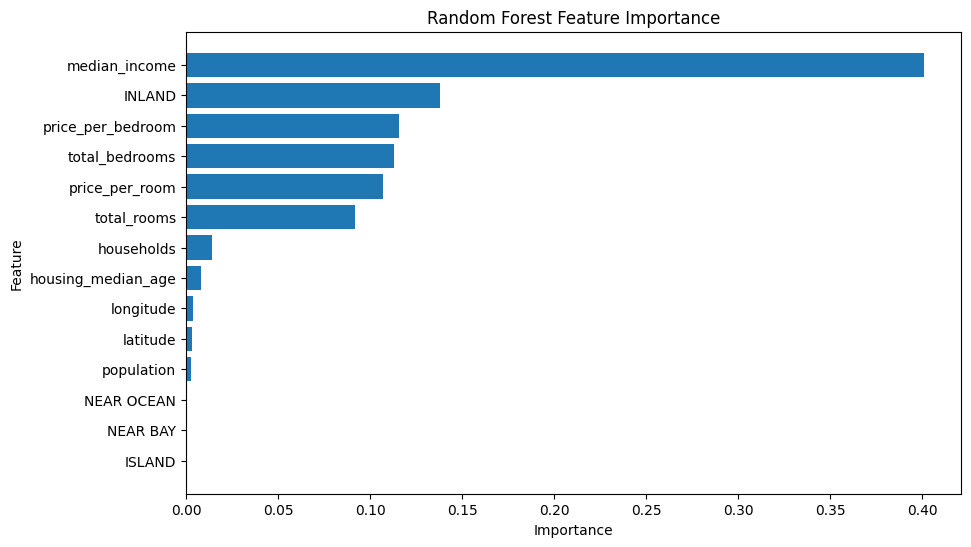

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model
feature_importances = random_forest_model.feature_importances_

# Create a dataframe to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R-squared: {r2_best_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_de

## Tensorflow Models

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [20]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # First hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1))  # Output layer for regression (single value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 55892402176.0000 - val_loss: 55671316480.0000
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 53411139584.0000 - val_loss: 48510451712.0000
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 44139225088.0000 - val_loss: 35151237120.0000
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 31576965120.0000 - val_loss: 21922652160.0000
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 19192418304.0000 - val_loss: 14236353536.0000
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 12874039296.0000 - val_loss: 11394704384.0000
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 11246044160.0000 - val_loss: 10294038528.0000
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 9975145472.0000 - val_loss: 9510234112.0000
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 9115873280.0000 - val_loss: 8856084480.0000
Epoch 10/100
511/511 ━━

In [23]:
# Predict on the test set
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network MSE: {mse_nn}')


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
Neural Network MSE: 4287500653.833344


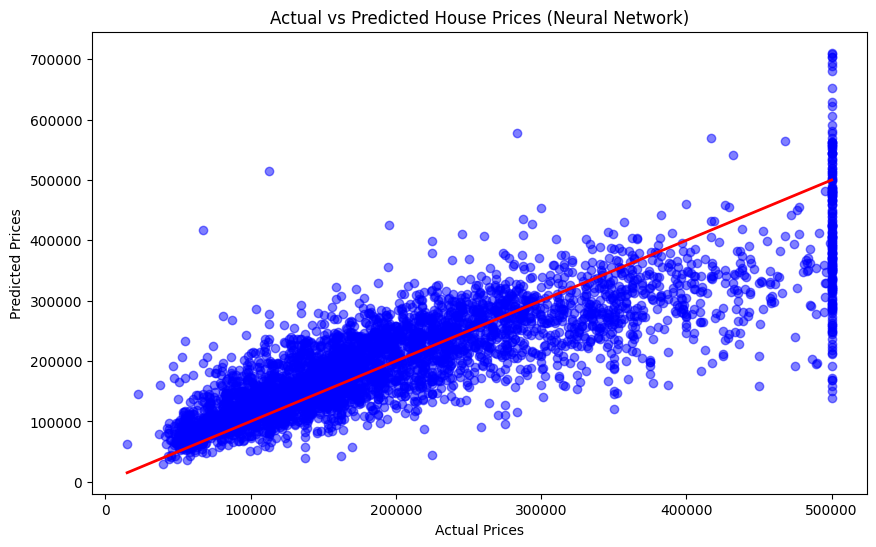

In [24]:
import matplotlib.pyplot as plt

# Generate a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2)  # Perfect predictions line
plt.title('Actual vs Predicted House Prices (Neural Network)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


### Residual Analysis

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 4156460288.0000 - val_loss: 4259594240.0000
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 4133418752.0000 - val_loss: 4261669632.0000
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 4217825024.0000 - val_loss: 4258606592.0000
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 4184108800.0000 - val_loss: 4252356096.0000
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 4204595200.0000 - val_loss: 4255258112.0000
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 4190133504.0000 - val_loss: 4251401216.0000
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 4168384512.0000 - val_loss: 4253988608.0000
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 4059351808.0000 - val_loss: 4249987072.0000
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 4151724032.0000 - val_loss: 4246692096.0000
Epoch 10/100
511/511 ━━━━━━━━━━━━━━━━

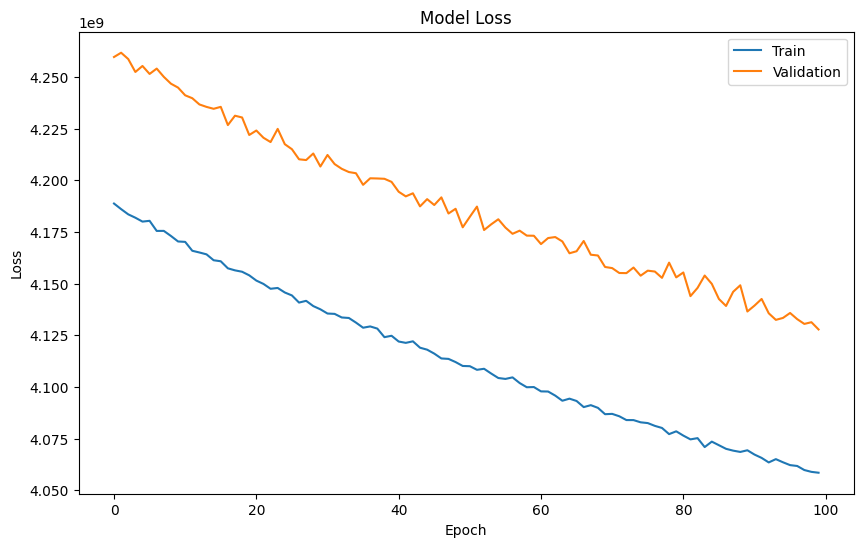

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit() which includes the loss and accuracy metrics
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


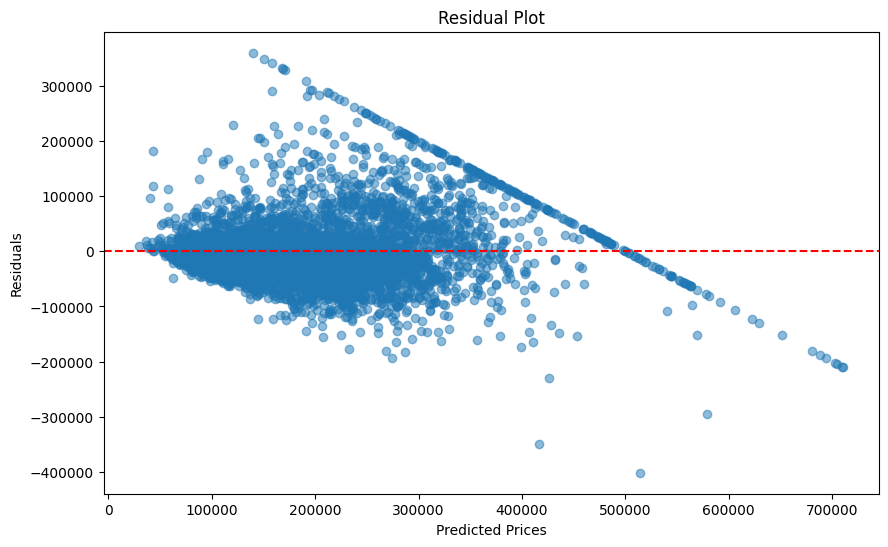

In [28]:
residuals = y_test - y_pred_nn.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


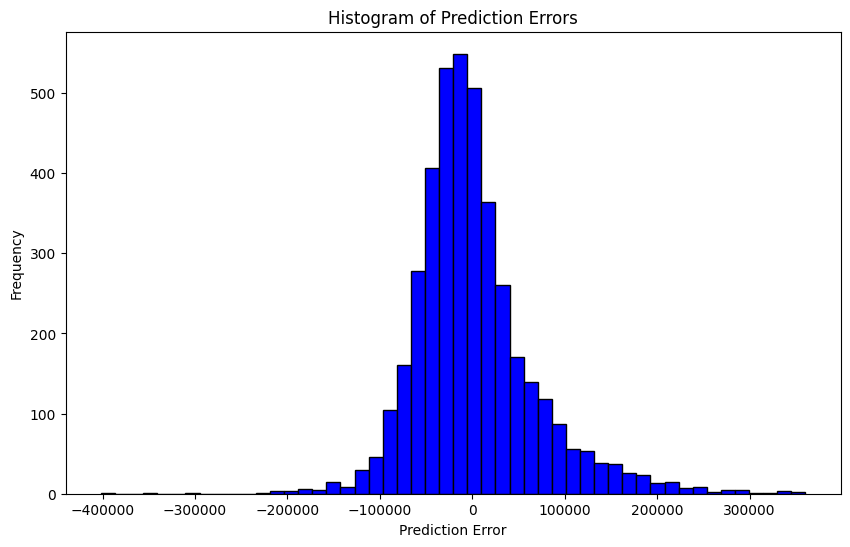

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


### Correlation Heatmap of Input Features

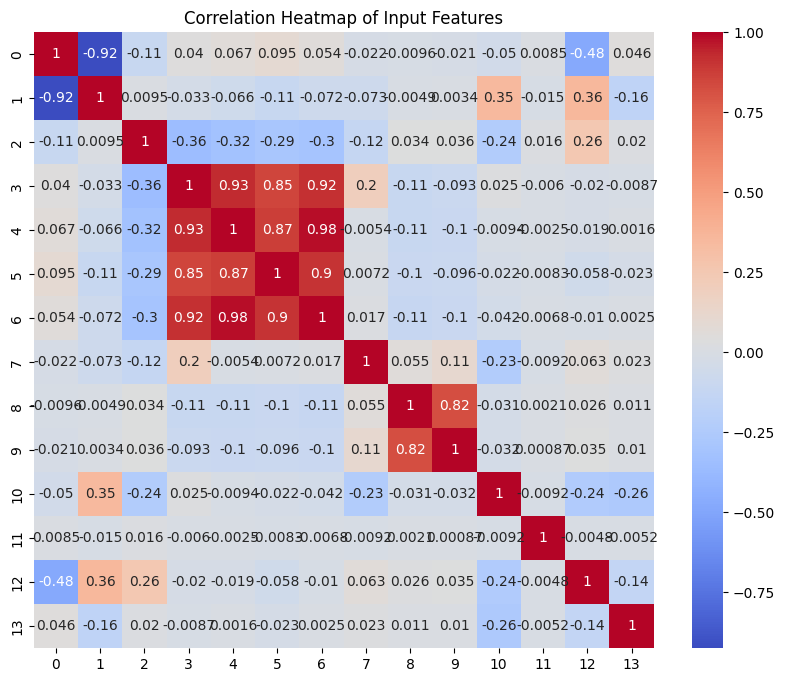

In [31]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Input Features')
plt.show()


In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler

def plot_lr_schedule(epoch, lr):
    epochs = list(range(1, 101))
    lrs = [lr_schedule(e) for e in epochs]  
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, lrs)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()


In [38]:
# Define the learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01  # Initial learning rate
    decay_factor = 0.95  # Decay factor
    lr = initial_lr * (decay_factor ** epoch)
    return lr


In [39]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model using the learning rate scheduler
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[lr_scheduler])


Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 4035140864.0000 - val_loss: 4171987712.0000 - learning_rate: 0.0100
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 4003508480.0000 - val_loss: 4142533120.0000 - learning_rate: 0.0095
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 4193722368.0000 - val_loss: 4100745984.0000 - learning_rate: 0.0090
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 4118167552.0000 - val_loss: 4145916672.0000 - learning_rate: 0.0086
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 4069235200.0000 - val_loss: 4070937600.0000 - learning_rate: 0.0081
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 4097308416.0000 - val_loss: 4044463104.0000 - learning_rate: 0.0077
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 3923592960.0000 - val_loss: 4053832960.0000 - learning_rate: 0.0074
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 3990602496.0000 - va

### Learning Rate Schedule

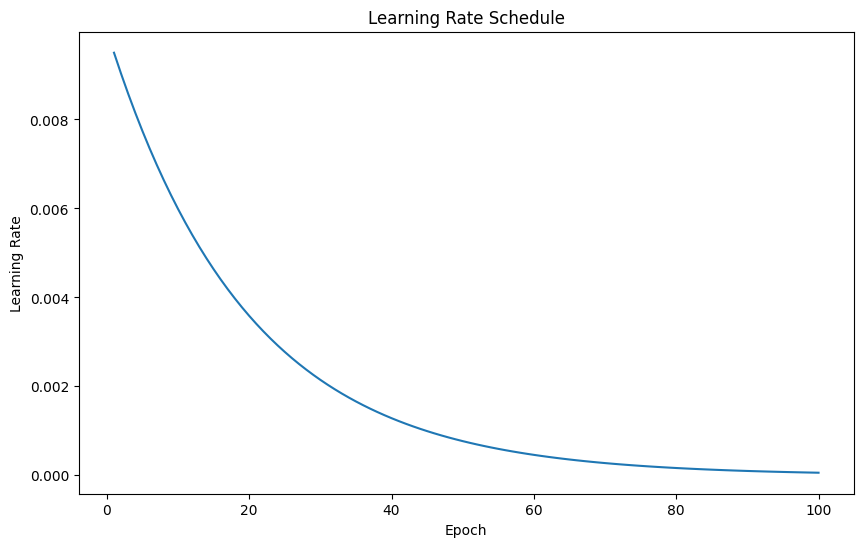

In [41]:
def plot_lr_schedule():
    epochs = list(range(1, 101))  # Define the range of epochs (1 to 100)
    lrs = [lr_schedule(epoch) for epoch in epochs]  # Calculate learning rate for each epoch
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, lrs)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()

plot_lr_schedule()
